<center><h1> Gradient Boosting </h1></center>
<center> A high-level implementation in Python </center>

# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error as mse

# Pseudo-Code

The algorithm can be then described as the following, on a dataset $(x,y)$ with $x$ the features and $y$ the targets, with a differentiable loss function $\cal{L}$:

$$ \cal{L} = \frac {1} {2} (Obs - Pred)^2 $$, called the Squared Residuals. 

**Step 1** : Initialize the model with a constant value : $ \gamma = \frac{ \sum_i y_i }{n} = \bar{y} $

This is simply the average of the observations. 

---

**Step 2** : For each tree m = 1 to M (the maximum number of trees specified, e.g 100) 

- a) Compute the pseudo-residuals for every sample, i.e the true value - the predicted value :
    
    $ r_{im}  = (Obs - Pred) $

---

- b) Fit a regression tree on the residuals, and predict the residuals $ r_t $

---

- c) Update the prediction : 

$ Pred_t(x) = Pred_{t-1}(x) + lr \times r_t $

---

# Generate the data

We start by generating random data :

In [3]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

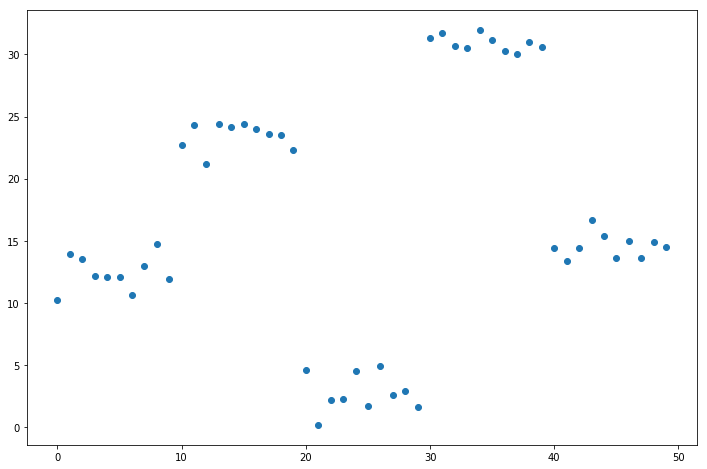

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.show()

# Fit a decision tree

In [5]:
clf = tree.DecisionTreeRegressor(max_depth=1)
model = clf.fit(x,y)

In [6]:
threshold = model.tree_.threshold[0]
r = np.where(x == threshold)
left_idx = np.where(x <= threshold)
right_idx = np.where(x > threshold)
print(threshold)

29.5


In [7]:
pred = model.predict(x)

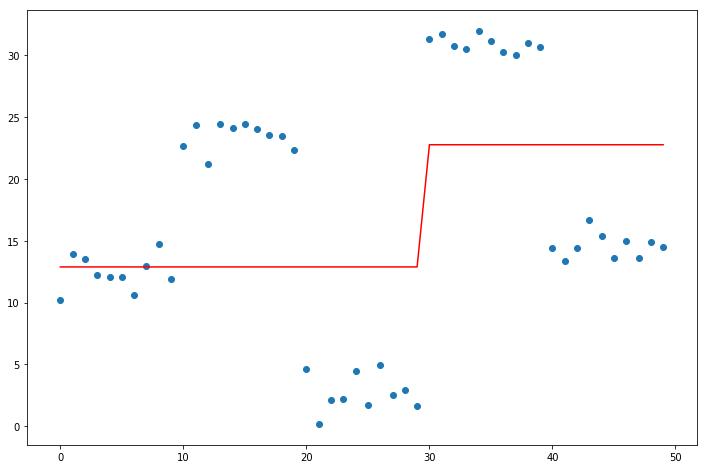

In [8]:
plt.figure(figsize=(12,8))
plt.plot(x, pred, c='red')
plt.scatter(x,y)
plt.show()

In [9]:
print(mse(pred, y))

70.88288005865793


This is the starting point for our estimation. Now, we need to go further and make our model more complex by implementing gradient boosting.

# Gradient Boosting

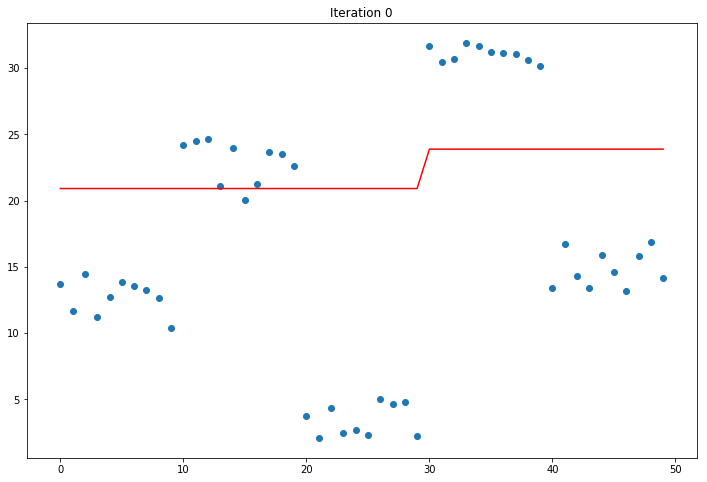

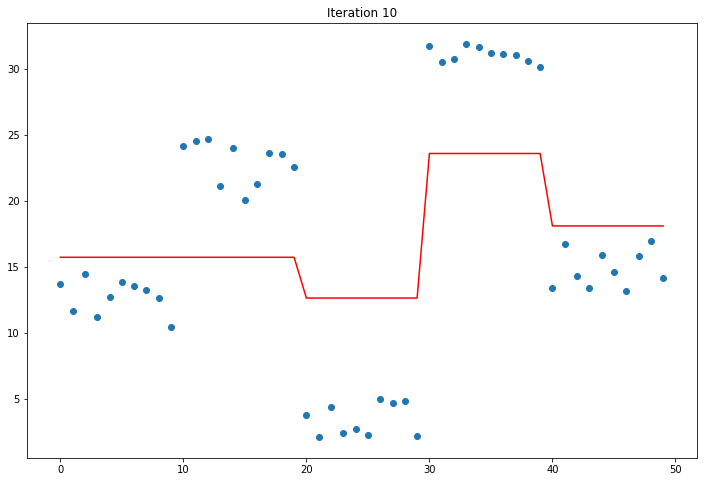

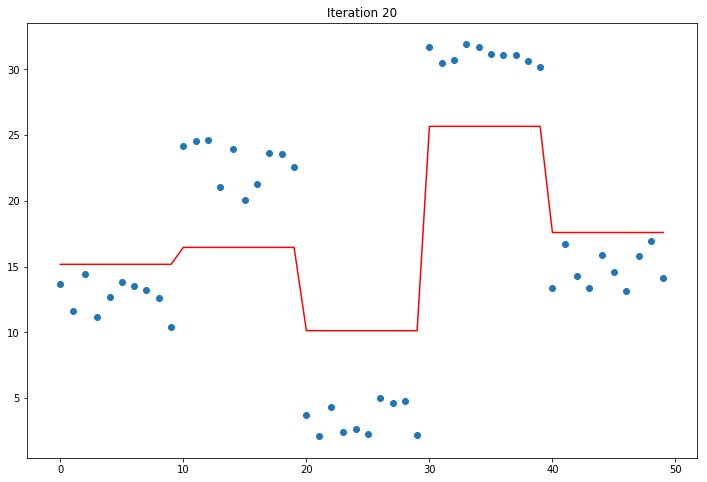

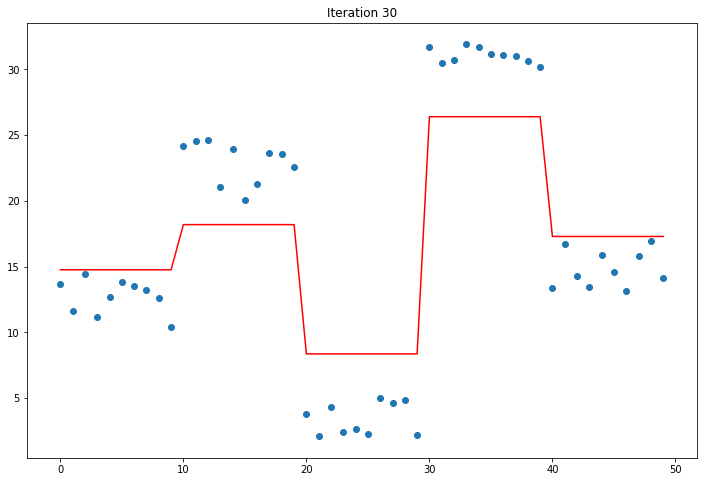

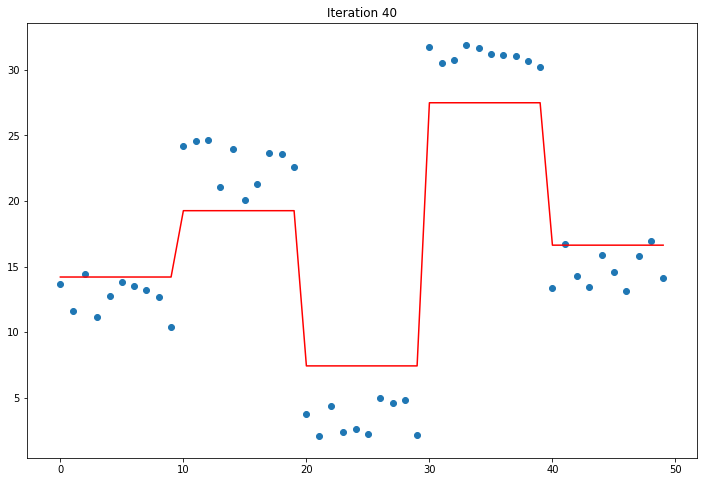

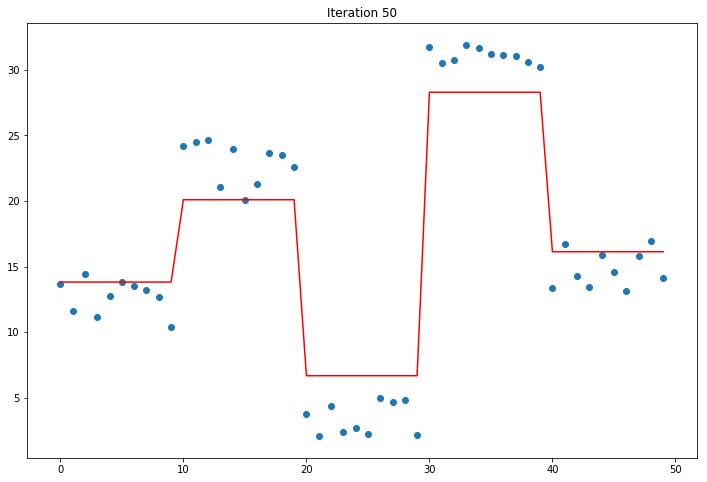

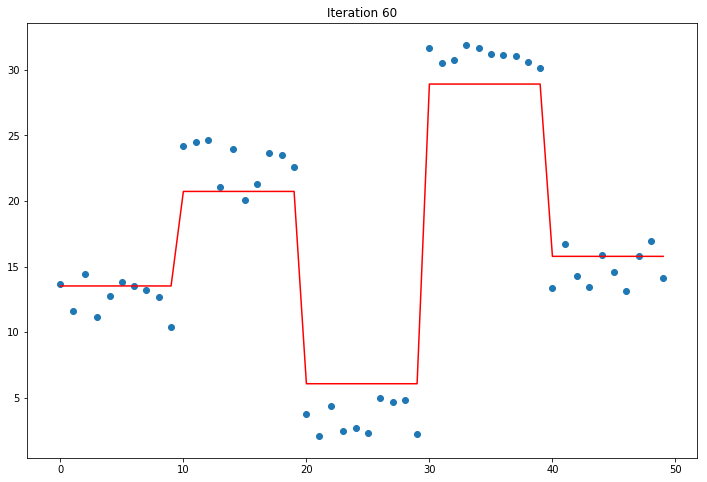

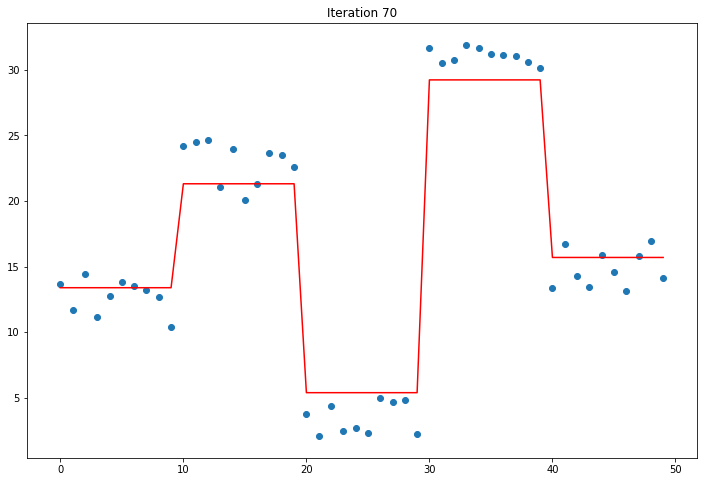

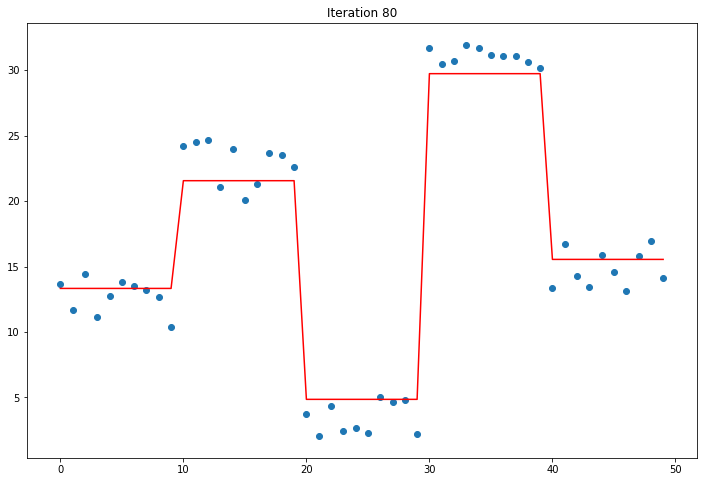

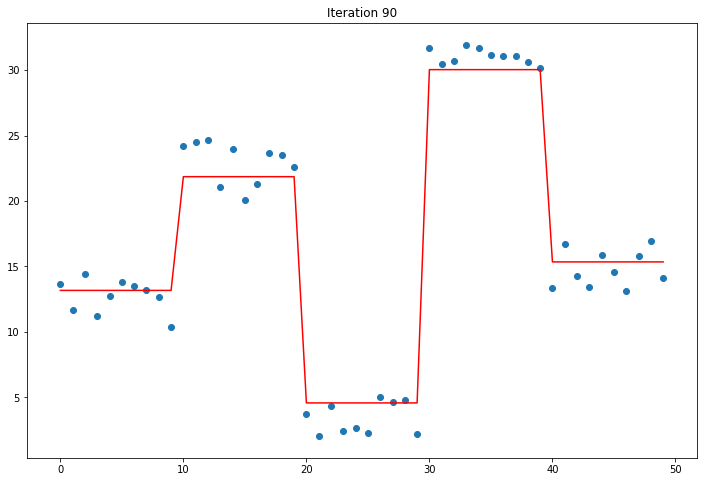

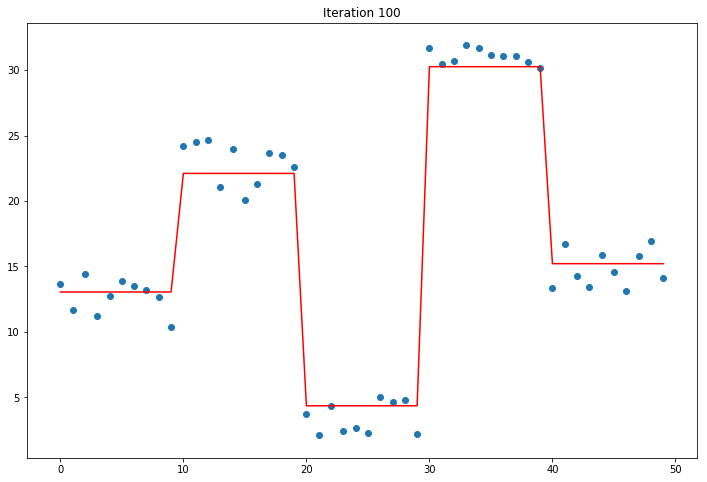

In [192]:
# Step 1
# Save of copy of the input data x and y
# Initialize the error, and the prediction
# Define the learning rate (0.3)

xi = x.copy()
yi = y.copy()

ei = 0
n = len(yi)
predf = np.ones(n) * np.mean(yi)

lr = 0.3

# Iterate according to the number of iterations chosen
for i in range(101):
    
    # Step 2.a)
    # Fit the decision tree / stump (max_depth = 1) on xi, yi
    
    clf = tree.DecisionTreeRegressor(max_depth=1)
    model = clf.fit(xi, yi)
    
    # Use the fitted model to predict yi

    predi = model.predict(xi)
    
    # Step 2.c)
    # Compute the new prediction (learning rate !)
    # Compute the new residuals, 
    # Set the new yi equal to the residuals
    
    predf = predf + lr * predi
    ei = y.reshape(-1,) - predf
    yi = ei

    # Every 10 iterations, plot the prediction vs the actual data
    if i % 10 == 0 :
        plt.figure(figsize=(12,8))
        plt.plot(x, predf, c='r')
        plt.scatter(x, y)
        plt.title("Iteration " + str(i))
        plt.show()